In [ ]:
# Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

1. Загрузка данных в среду.

In [ ]:
data_heart = pd.read_csv('heart.csv')

In [ ]:
data_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


В данных нет пропусков. 5 категориальных признаков: 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', ST_Slope'.

2. Подготовка данных к обучению моделей.

Преобразование категориальных переменных.

In [ ]:
# Вывод уникальных значений для категориальных столбцов
data_heart['Sex'].unique(), data_heart['ChestPainType'].unique(), data_heart['RestingECG'].unique(), data_heart['ExerciseAngina'].unique(), data_heart['ST_Slope'].unique()

(array(['M', 'F'], dtype=object),
 array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 array(['Normal', 'ST', 'LVH'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Up', 'Flat', 'Down'], dtype=object))

Признаки 'Sex', 'ExerciseAngina' преобразуем с помощью LabelEncoder. Признаки 'ChestPainType', 'RestingECG', 'ST_Slope' с помощью get_dummies.

In [ ]:
le = LabelEncoder()
data_heart['Sex'] = le.fit_transform(data_heart['Sex'])
data_heart['ExerciseAngina'] = le.fit_transform(data_heart['ExerciseAngina'])

In [ ]:
data_heart = pd.get_dummies(data_heart, columns = ['ChestPainType', 'RestingECG', 'ST_Slope'])

In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ST_Slope_Down      918 non

Построение графиков.

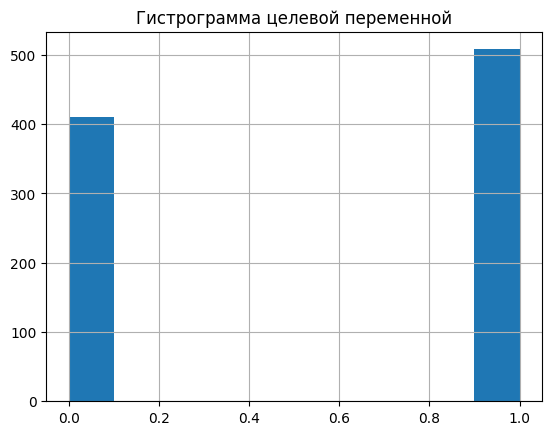

In [ ]:
plt.hist(data_heart['HeartDisease'])
plt.title('Гистрограмма целевой переменной')
plt.grid()
plt.show()

Целевые классы в целом сбалансирован между собой.

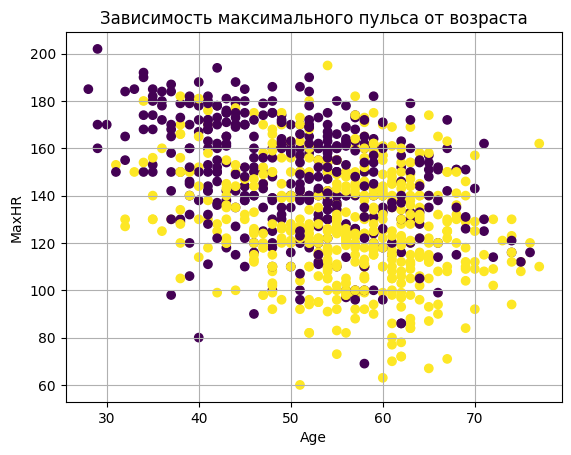

In [ ]:
plt.scatter(data_heart['Age'], data_heart['MaxHR'], c = data_heart['HeartDisease'])
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.title('Зависимость максимального пульса от возраста')
plt.grid()
plt.show()

На графике видно, что максимальный пульс с возрастом снижается, а количество пациентов с болезнями сердца увеличивается.

3. Разделим выборку на обучающее и тестовое множество.

In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ST_Slope_Down      918 non

In [ ]:
# Разделим датафрейм на признаки и целевую переменную
X = data_heart.loc[:, data_heart.columns !='HeartDisease']
y = data_heart['HeartDisease']

In [ ]:
# Деление выборки на обучающее и тестовое множество
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

4. Обучите дерево решений на обучающем множестве. Используйте следующие модели.

Обучение модели DecisionTreeClassifier.

In [ ]:
# Инициализация модели
model_DT = DecisionTreeClassifier(max_depth = 3, splitter = 'best', random_state = 9)

In [ ]:
# Обучение модели
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=9)

Обучение модели RandomForestClassifier.

In [ ]:
# Инициализация модели
model_RF = RandomForestClassifier(n_estimators = 400, random_state = 9, max_depth = 7)

In [ ]:
# Обучение модели
model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=400, random_state=9)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [ ]:
# Предсказания модели DecisionTreeClassifier
y_pred_DT = model_DT.predict(X_test)

In [ ]:
# Предсказания модели RandomForestClassifier
y_pred_RF = model_RF.predict(X_test)

In [ ]:
# Вывод метрик качества модели
print(f'Метрики качества для модели DecisionTreeClassifier:\n{classification_report(y_test, y_pred_DT, digits = 3)}')

Метрики качества для модели DecisionTreeClassifier:
              precision    recall  f1-score   support

           0      0.866     0.789     0.826        90
           1      0.814     0.883     0.847        94

    accuracy                          0.837       184
   macro avg      0.840     0.836     0.836       184
weighted avg      0.839     0.837     0.836       184



In [ ]:
# Вывод метрик качества модели
print(f'Метрики качества для модели RandomForestClassifier:\n{classification_report(y_test, y_pred_RF, digits = 3)}')

Метрики качества для модели RandomForestClassifier:
              precision    recall  f1-score   support

           0      0.949     0.833     0.888        90
           1      0.857     0.957     0.905        94

    accuracy                          0.897       184
   macro avg      0.903     0.895     0.896       184
weighted avg      0.902     0.897     0.896       184



6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [ ]:
importance = pd.Series(model_RF.feature_importances_)

In [ ]:
importance.index = pd.Series(X_train.columns)

In [ ]:
importance = importance.sort_values(ascending=False)
importance

ST_Slope_Up          0.188130
ST_Slope_Flat        0.129705
ChestPainType_ASY    0.100659
Oldpeak              0.083204
MaxHR                0.082034
ExerciseAngina       0.081564
Cholesterol          0.073819
Age                  0.055007
RestingBP            0.051964
Sex                  0.034841
ChestPainType_ATA    0.030018
FastingBS            0.025362
RestingECG_LVH       0.017646
ChestPainType_NAP    0.014580
RestingECG_Normal    0.010268
ST_Slope_Down        0.007764
RestingECG_ST        0.007484
ChestPainType_TA     0.005951
dtype: float64

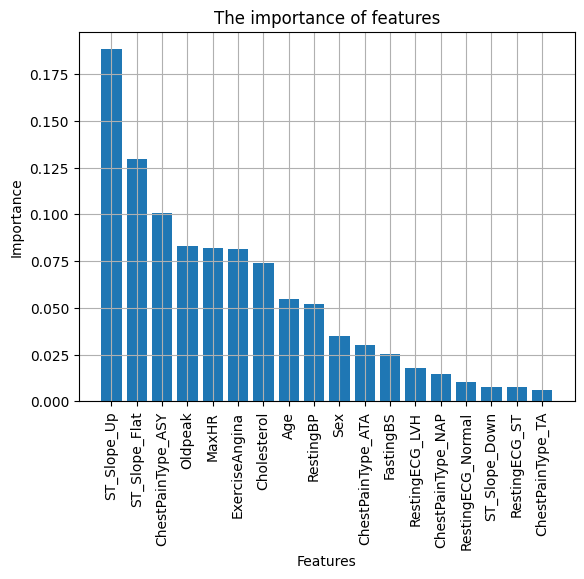

In [ ]:
plt.title('The importance of features')
plt.xlabel('Features')
plt.xticks(rotation = 90)
plt.ylabel('Importance')
plt.bar(importance.head(len(importance)).index, importance.head(len(importance)))
plt.grid()
plt.show()

7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [ ]:
# Инициализация модели с параметрами
model_bag = BaggingClassifier(model_DT, random_state = 9, n_estimators = 40, bootstrap_features = True)

In [ ]:
# Обучение модели
model_bag.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(max_depth=3, random_state=9),
                  n_estimators=40, random_state=9)

In [ ]:
# Предсказания
y_pred_bag = model_bag.predict(X_test)

In [ ]:
# Вывод метрик качества модели
print(f'Метрики качества для модели BaggingClassifier:\n{classification_report(y_test, y_pred_bag, digits = 3)}')

Метрики качества для модели BaggingClassifier:
              precision    recall  f1-score   support

           0      0.910     0.789     0.845        90
           1      0.821     0.926     0.870        94

    accuracy                          0.859       184
   macro avg      0.866     0.857     0.858       184
weighted avg      0.865     0.859     0.858       184



8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [ ]:
# Инициализация модели
estimators = [('DT', model_DT), ('RF', model_RF), ('SVC', make_pipeline(StandardScaler(), LinearSVC(random_state = 9, max_iter = 5000)))]
model_st = StackingClassifier(estimators = estimators)

In [ ]:
# Обучение модели
model_st.fit(X_train, y_train)

StackingClassifier(estimators=[('DT',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=9)),
                               ('RF',
                                RandomForestClassifier(max_depth=7,
                                                       n_estimators=400,
                                                       random_state=9)),
                               ('SVC',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(max_iter=5000,
                                                           random_state=9))]))])

In [ ]:
# Предсказания модели
y_pred_st = model_st.predict(X_test)

In [ ]:
# Вывод метрик качества
print(f'Метрики качества для модели StackingClassifier:\n{classification_report(y_test, y_pred_st, digits = 3)}')

Метрики качества для модели StackingClassifier:
              precision    recall  f1-score   support

           0      0.915     0.833     0.872        90
           1      0.853     0.926     0.888        94

    accuracy                          0.880       184
   macro avg      0.884     0.879     0.880       184
weighted avg      0.883     0.880     0.880       184



Выводы:
* любой ансамбль моделей дает лучшие результаты по сравнению с использованием базовой модели в чистом виде; этот вывод можно сделать по метрикам качества сравниваемых в работе моделей;
* в моем варианте (для разных моделей я пробовал варьировать различные параметры из документации) лучшие результаты исходя из метрик показала модель "Случайный лес".
* При этом заметил, что стэкинг обучался дольше всех, 5 секунд, против условно 0 секунд в остальных моделях. Я увеличил количество итераций в SVC до 5000, так как при значении по умолчанию получал предупреждение "usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. warnings.warn("; которое кстати никак не влияло на окончательный результат. Но это увеличение числа итераций не привело к увеличению обучения модели. При значении max_iter = 1000 по умолчанию обучение длилось вообще 10 секунд.